In [4]:
pwd()

'/home/user/CODE/SingleCell_DataAnalysis/notebooks'

In [5]:
import os
os.chdir('/home/user/CODE/SingleCell_DataAnalysis/src/')
%run setup.py

FileNotFoundError: [Errno 2] No such file or directory: '/home/user/CODE/Bioinformatics/SingleCell_DataAnalysis/src/'

Let us set some parameters

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

/home/user/CODE/Bioinformatics/SingleCell_DataAnalysis/scda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.14.0rc0 pynndescent==0.5.10


Fetch the data 3k PBMCs from 10x Genomics using wget:

!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz

In [ ]:
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz

In [4]:
# !pip install IProgress

In [6]:
# update requirements.txt
# !pip freeze > requirements.txt

Create the results object

In [4]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

Read in the count matrix into an AnnData object, which holds many slots for annotations and different representations of the data. It also comes with its own HDF5-based file format: .h5ad.

In [5]:
pwd()

'/home/user/CODE/Bioinformatics/SingleCell_DataAnalysis/src'

In [6]:
os.chdir('/home/user/CODE/Bioinformatics/SingleCell_DataAnalysis/data/')
adata = sc.read_10x_mtx(
    'filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/filtered_gene_bc_matrices-hg19-matrix.h5ad


In [7]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [8]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

# Preprocessing

Show those genes that yield the highest fraction of counts in each single cell, across all cells.

See: https://master.bioconductor.org/packages/release/workflows/html/simpleSingleCell.html#examining-gene-level-metrics
List of courses (I think all of them in R): https://master.bioconductor.org/help/course-materials/

normalizing counts per cell
    finished (0:00:00)


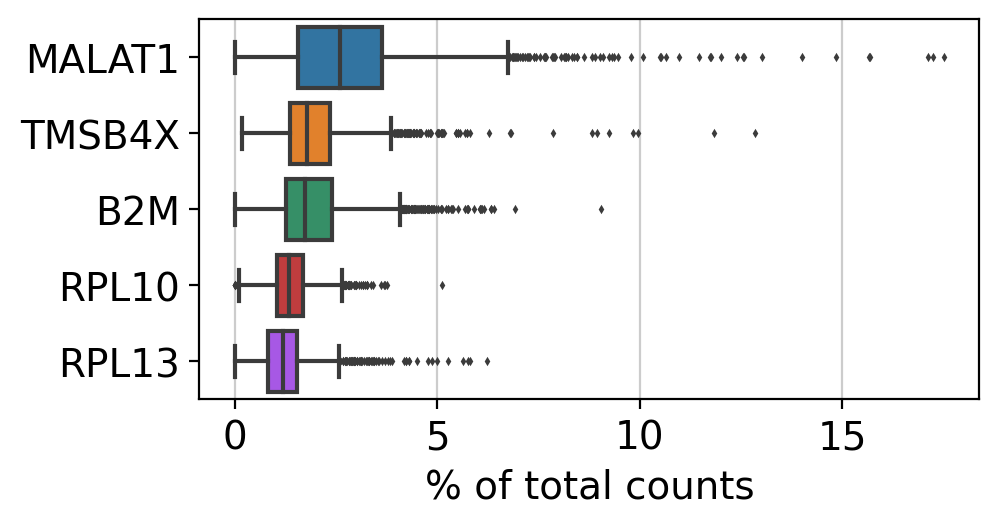

In [9]:
sc.pl.highest_expr_genes(adata, n_top=5, )

In [15]:
# add and commit changes
# !git add .
# !git commit -m "add scanpy exploration 02"
# !git status
 
## better to do all the git stuff in the terminal 

The following paths are ignored by one of your .gitignore files:
data
hint: Use -f if you really want to add them.
hint: Turn this message off by running
hint: "git config advice.addIgnoredFile false"
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../notebooks/0.1_scanpy_exploration.ipynb
	modified:   ../src/setup.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../notebooks/0.2_scanpy_exploration.ipynb
	../src/requirements.txt

no changes added to commit (use "git add" and/or "git commit -a")
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../notebooks/0.1_scanpy_explorat